In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Goal is to cluster the data and treat them as individual datasets to train, Regression models to predict ‘mpg’

In [31]:
mpg_df_orig = pd.read_csv('cars-dataset.csv')
mpg_df = pd.DataFrame.copy(mpg_df_orig)
mpg_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [32]:
mpg_df.shape

(398, 8)

In [33]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [34]:
missing_values = mpg_df.isna().sum().sum() + mpg_df.isnull().sum().sum()
print("There are {} missing values in the cars dataset".format(missing_values))

There are 0 missing values in the cars dataset


4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64


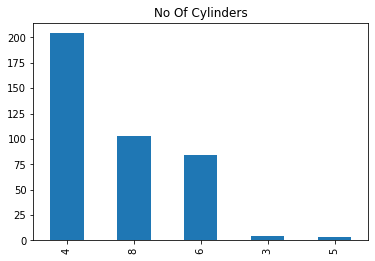

In [35]:
mpg_df['cyl'].value_counts().plot.bar(title='No Of Cylinders') 
print(mpg_df['cyl'].value_counts())

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: yr, dtype: int64


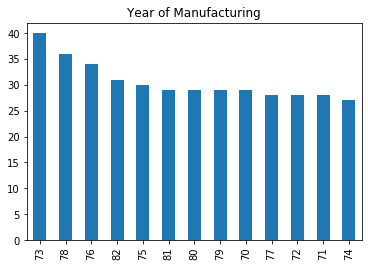

In [36]:
mpg_df['yr'].value_counts().plot.bar(title='Year of Manufacturing') 
print(mpg_df['yr'].value_counts())

In [37]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit()) # Identifying ? in the dataset for Hp column
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [38]:
mpg_df = mpg_df.replace('?', np.nan) # replacing the ? in to Nan Values for treatment
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [39]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')
mpg_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0


In [40]:
# imputing missing values for hp
numeric_cols = mpg_df.drop('car name', axis=1)
car_names = pd.DataFrame(mpg_df[['car name']])
numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0) # imputing median value
mpg_df = numeric_cols.join(car_names)   # Recreating mpg_df by combining numerical columns with car names
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [41]:
mpg_features = mpg_df.drop(['car name'], axis=1)
mpg_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [42]:
print(mpg_features.kurtosis(numeric_only = True, axis = 0))
print("Kurtosis with positive values indicates that those attributes have more data points around the tail")

cyl    -1.376662
disp   -0.746597
hp      0.763583
wt     -0.785529
acc     0.419497
yr     -1.181232
mpg    -0.510781
dtype: float64
Kurtosis with positive values indicates that those attributes have more data points around the tail


In [43]:
# univariate analysis
print(mpg_features.skew(numeric_only = True, axis = 0))
print ('The positive values of Skew indicates Right-skewed distribution and negative values Left-Skewed distribution')

cyl     0.526922
disp    0.719645
hp      1.106224
wt      0.531063
acc     0.278777
yr      0.011535
mpg     0.457066
dtype: float64
The positive values of Skew indicates Right-skewed distribution and negative values Left-Skewed distribution


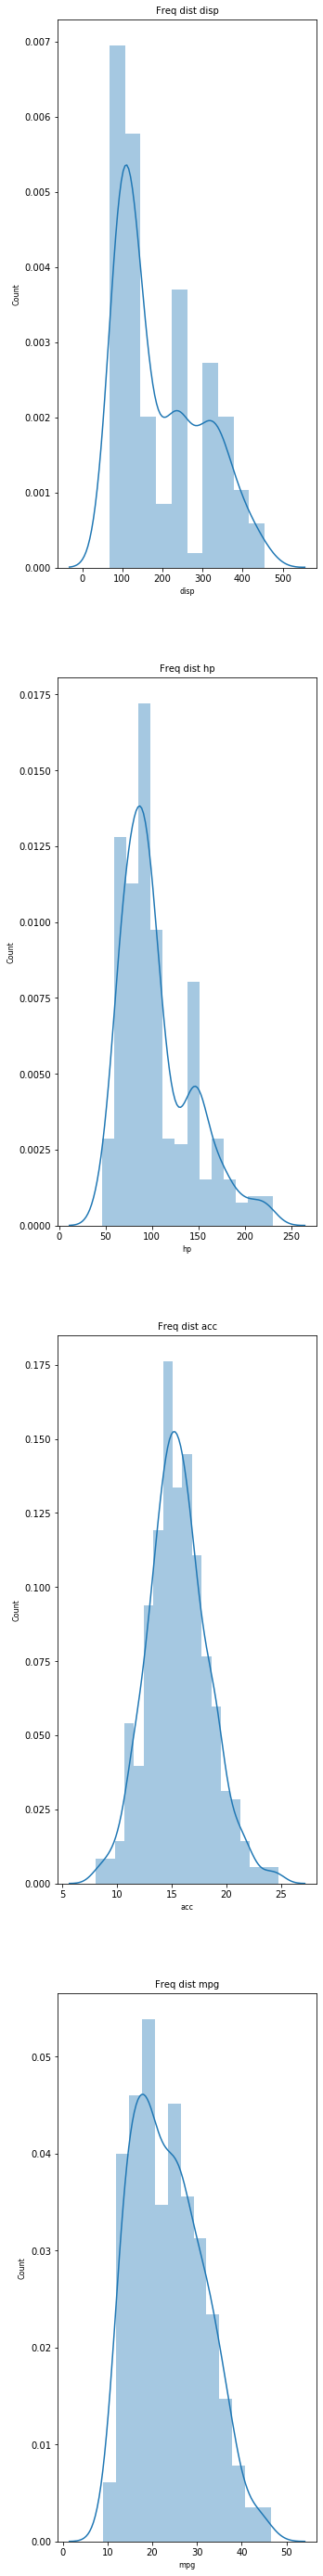

In [44]:
# plotting Univariate distribution using distplot and reading the independent variables dispersion
col_names = mpg_features.select_dtypes(include=[np.float64]).columns
fig, ax = plt.subplots(len(col_names), figsize=(5,50))

for i, col_val in enumerate(col_names):
    sns.distplot(mpg_features[col_val], kde = True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

(7.0, 0.0)

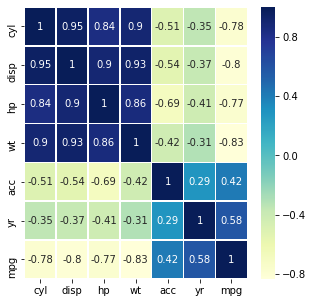

In [45]:
# Finding multi-collinearity - Bi-Variate Analysis
plt.figure(figsize=(5, 5))
ax = sns.heatmap(mpg_features.corr(),annot = True, linewidths = 0.5, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# features cy1, disp and hp and wt are multi-collinear

In [46]:
# Univariate Analysis
mpg_features.describe().transpose()

# disp: mean > median - Right skewed distribution
# hp: mean > median - Right skewed distribution
# Wt: mean > median - Right skewed distribution
# acc: Mean ~ Median - Normal distribution
# mpg: Mean ~ Median - Normal distribution

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


List of Outliers detected for - cyl 
  Series([], Name: cyl, dtype: int64)
List of Outliers detected for - disp 
  Series([], Name: disp, dtype: float64)
List of Outliers detected for - hp 
  6      220.0
7      215.0
8      225.0
13     225.0
25     215.0
26     200.0
27     210.0
67     208.0
94     215.0
95     225.0
116    230.0
Name: hp, dtype: float64
List of Outliers detected for - wt 
  Series([], Name: wt, dtype: int64)
List of Outliers detected for - acc 
  7       8.5
9       8.5
11      8.0
59     23.5
195    22.2
299    24.8
300    22.2
326    23.7
394    24.6
Name: acc, dtype: float64
List of Outliers detected for - yr 
  Series([], Name: yr, dtype: int64)
List of Outliers detected for - mpg 
  322    46.6
Name: mpg, dtype: float64


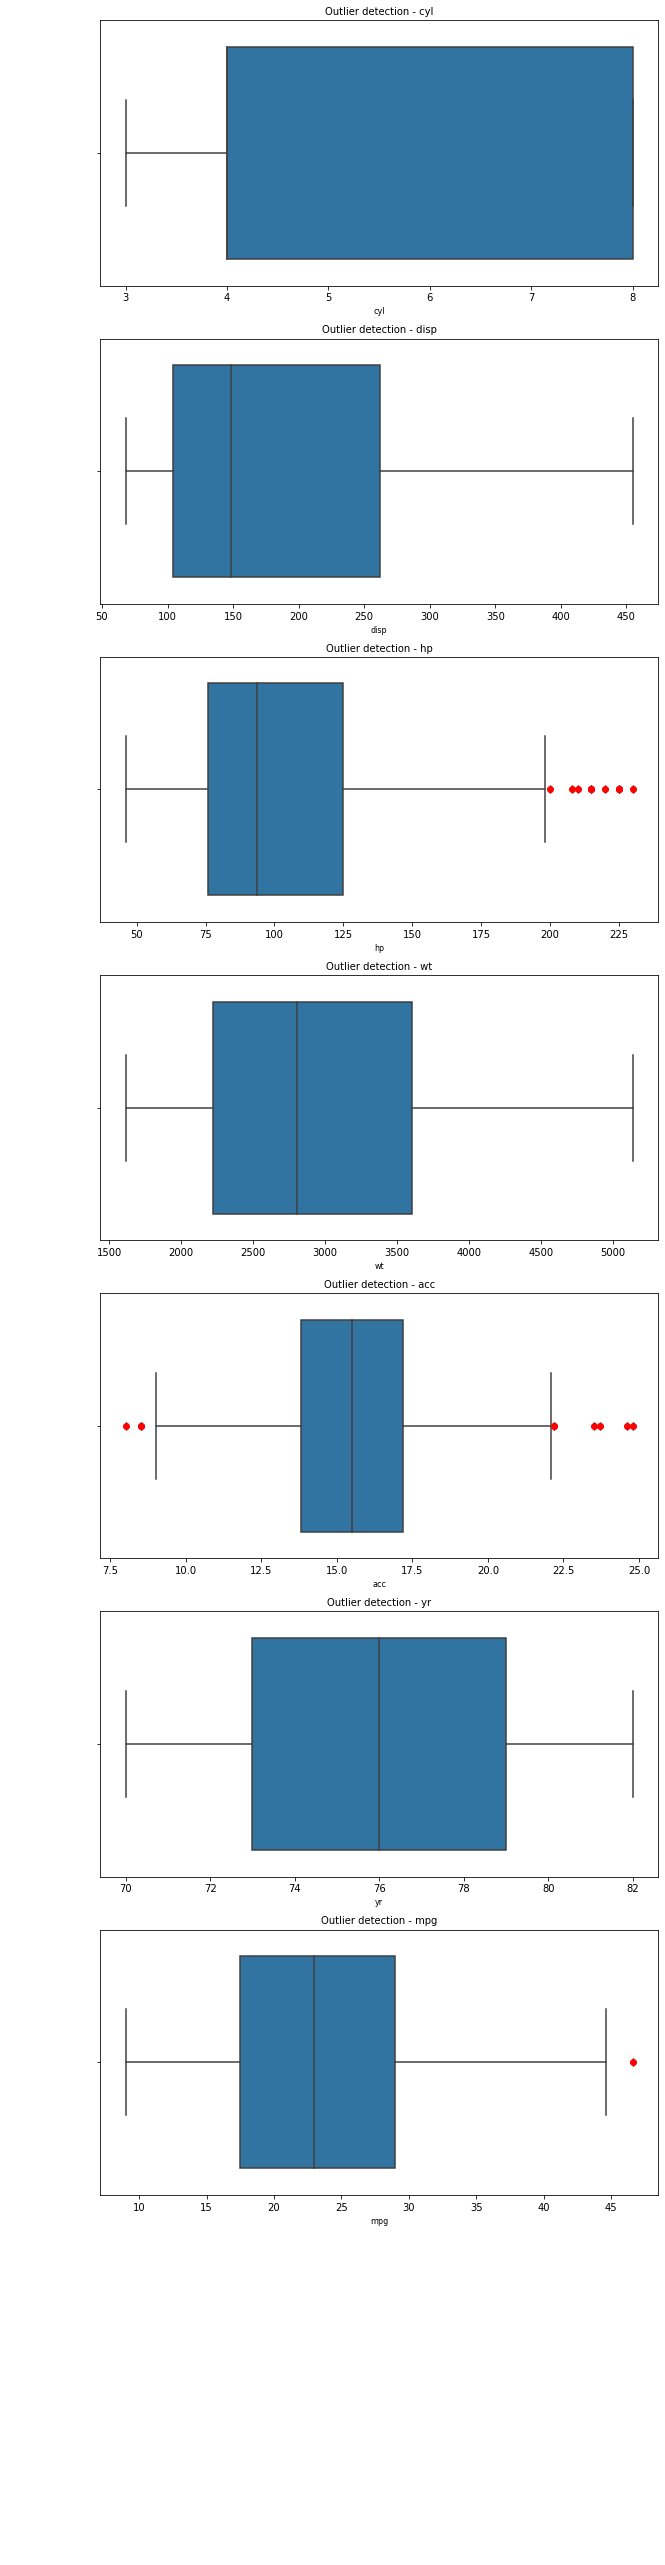

In [47]:
def IQR_based_outlier(data, threshold = 1.5):
    IQR = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    minval = np.quantile(data,0.25) - IQR * threshold
    maxval = np.quantile(data,0.75) + IQR * threshold
    return (data < minval)|(data > maxval)

col_names = mpg_features.select_dtypes(include=['float64','int64']).columns

fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):
    x = mpg_features[col_val][:1000]
    sns.boxplot(x, ax=ax[i])
    outliers = x[IQR_based_outlier(x)]
    print('List of Outliers detected for - {} \n '.format(col_val),outliers)
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

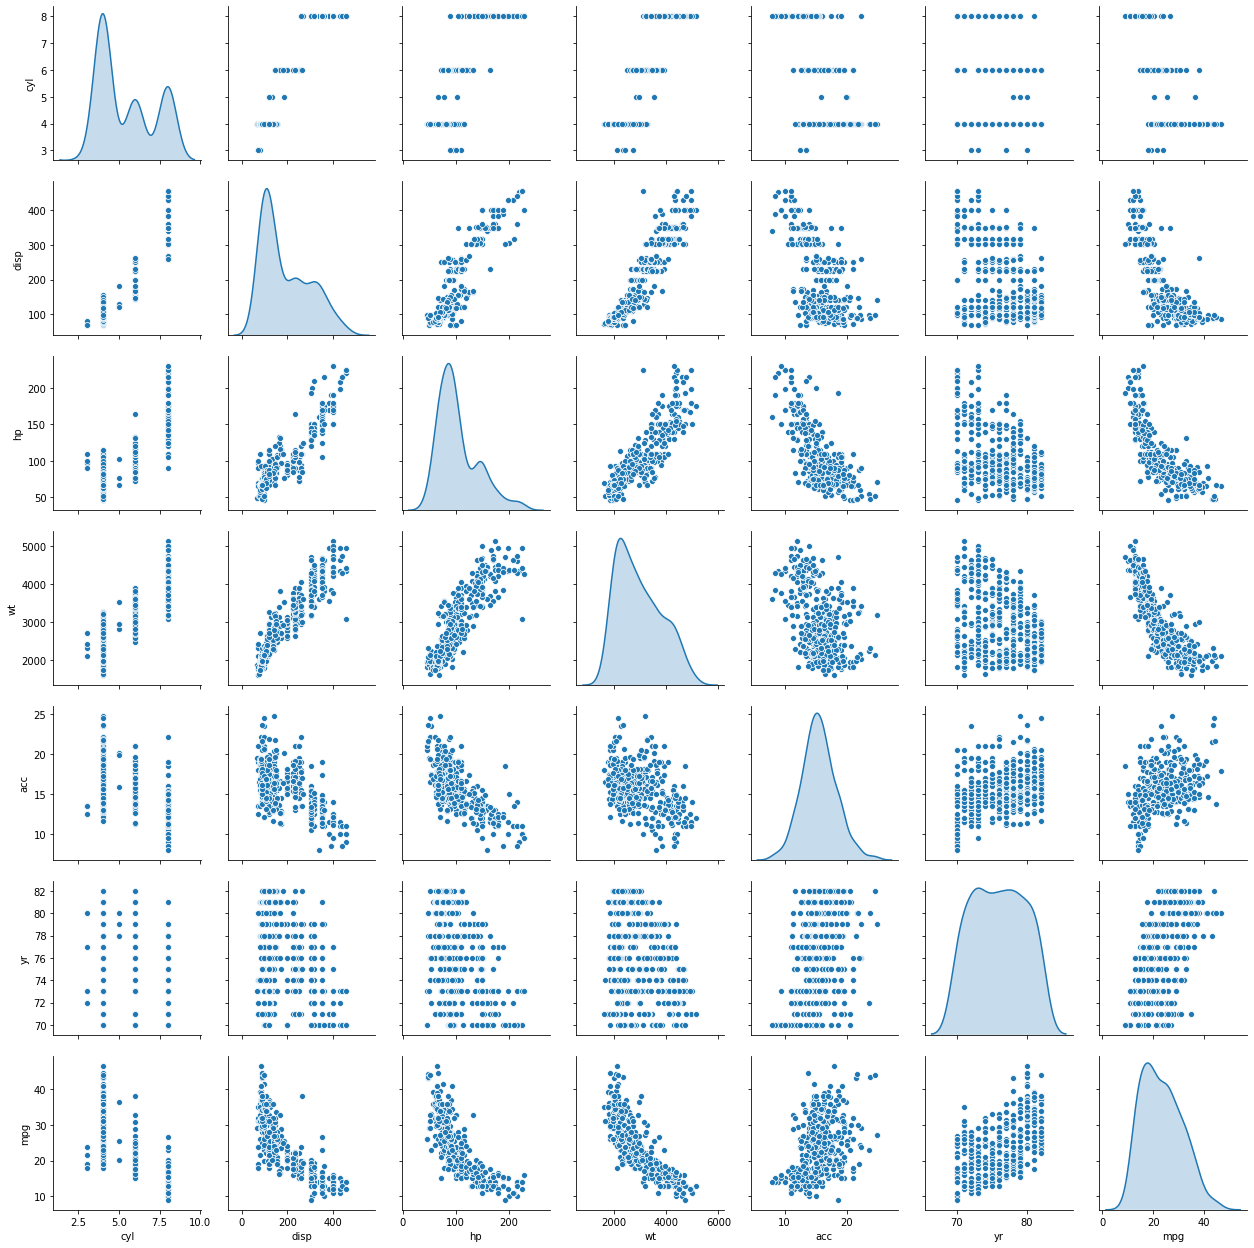

In [48]:
# Bi-variate analysis and visual cue for no of clusters
sns.pairplot(mpg_features, diag_kind = 'kde')

In [49]:
# Outliers detected for hp(11), acc(9), and mpg(1) columns - hp and mpg are right skewed while acc has skews in both direction
# Log Transformation to adress the skew and outliers
from sklearn import preprocessing
mpg_features_log = np.log(mpg_features + 1)
mpg_features_log

,cyl,disp,hp,wt,acc,yr,mpg
0,2.197225,5.730100,4.875197,8.161946,2.564949,4.262680,2.944439
1,2.197225,5.860786,5.111988,8.214465,2.525729,4.262680,2.772589
2,2.197225,5.765191,5.017280,8.142354,2.484907,4.262680,2.944439
3,2.197225,5.720312,5.017280,8.141481,2.564949,4.262680,2.833213
4,2.197225,5.713733,4.948760,8.146130,2.442347,4.262680,2.890372
...,...,...,...,...,...,...,...
393,1.609438,4.948760,4.465908,7.934155,2.809403,4.418841,3.332205
394,1.609438,4.584967,3.970292,7.664347,3.242592,4.418841,3.806662
395,1.609438,4.912655,4.442651,7.738924,2.533697,4.418841,3.496508
396,1.609438,4.795791,4.382027,7.873217,2.975530,4.418841,3.367296


In [50]:
# Scaling after Log transformation
from sklearn.preprocessing import StandardScaler
cols = mpg_features.columns
scaler = StandardScaler()
mpg_features_log = scaler.fit_transform(mpg_features_log)
mpg_features_log = pd.DataFrame(mpg_features_log, columns = cols)
mpg_features_log

,cyl,disp,hp,wt,acc,yr,mpg
0,1.437509,1.137909,0.822846,0.730485,-1.352629,-1.668157,-0.628218
1,1.437509,1.385691,1.525430,0.917911,-1.584805,-1.668157,-1.159014
2,1.437509,1.204442,1.244421,0.660568,-1.826459,-1.668157,-0.628218
3,1.437509,1.119350,1.244421,0.657452,-1.352629,-1.668157,-0.971762
4,1.437509,1.106877,1.041115,0.674041,-2.078400,-1.668157,-0.795216
...,...,...,...,...,...,...,...
393,-0.874093,-0.343518,-0.391561,-0.082433,0.094464,1.583862,0.569479
394,-0.874093,-1.033271,-1.862110,-1.045300,2.658822,1.583862,2.034945
395,-0.874093,-0.411973,-0.460567,-0.779156,-1.537635,1.583862,1.076965
396,-0.874093,-0.633549,-0.640447,-0.299903,1.077887,1.583862,0.677866


List of Outliers detected for - cyl 
  Series([], Name: cyl, dtype: float64)
List of Outliers detected for - disp 
  Series([], Name: disp, dtype: float64)
List of Outliers detected for - hp 
  Series([], Name: hp, dtype: float64)
List of Outliers detected for - wt 
  Series([], Name: wt, dtype: float64)
List of Outliers detected for - acc 
  6     -2.905750
7     -3.209392
9     -3.209392
11    -3.529454
12    -2.616926
116   -2.616926
299    2.704890
326    2.446961
394    2.658822
Name: acc, dtype: float64
List of Outliers detected for - yr 
  Series([], Name: yr, dtype: float64)
List of Outliers detected for - mpg 
  Series([], Name: mpg, dtype: float64)


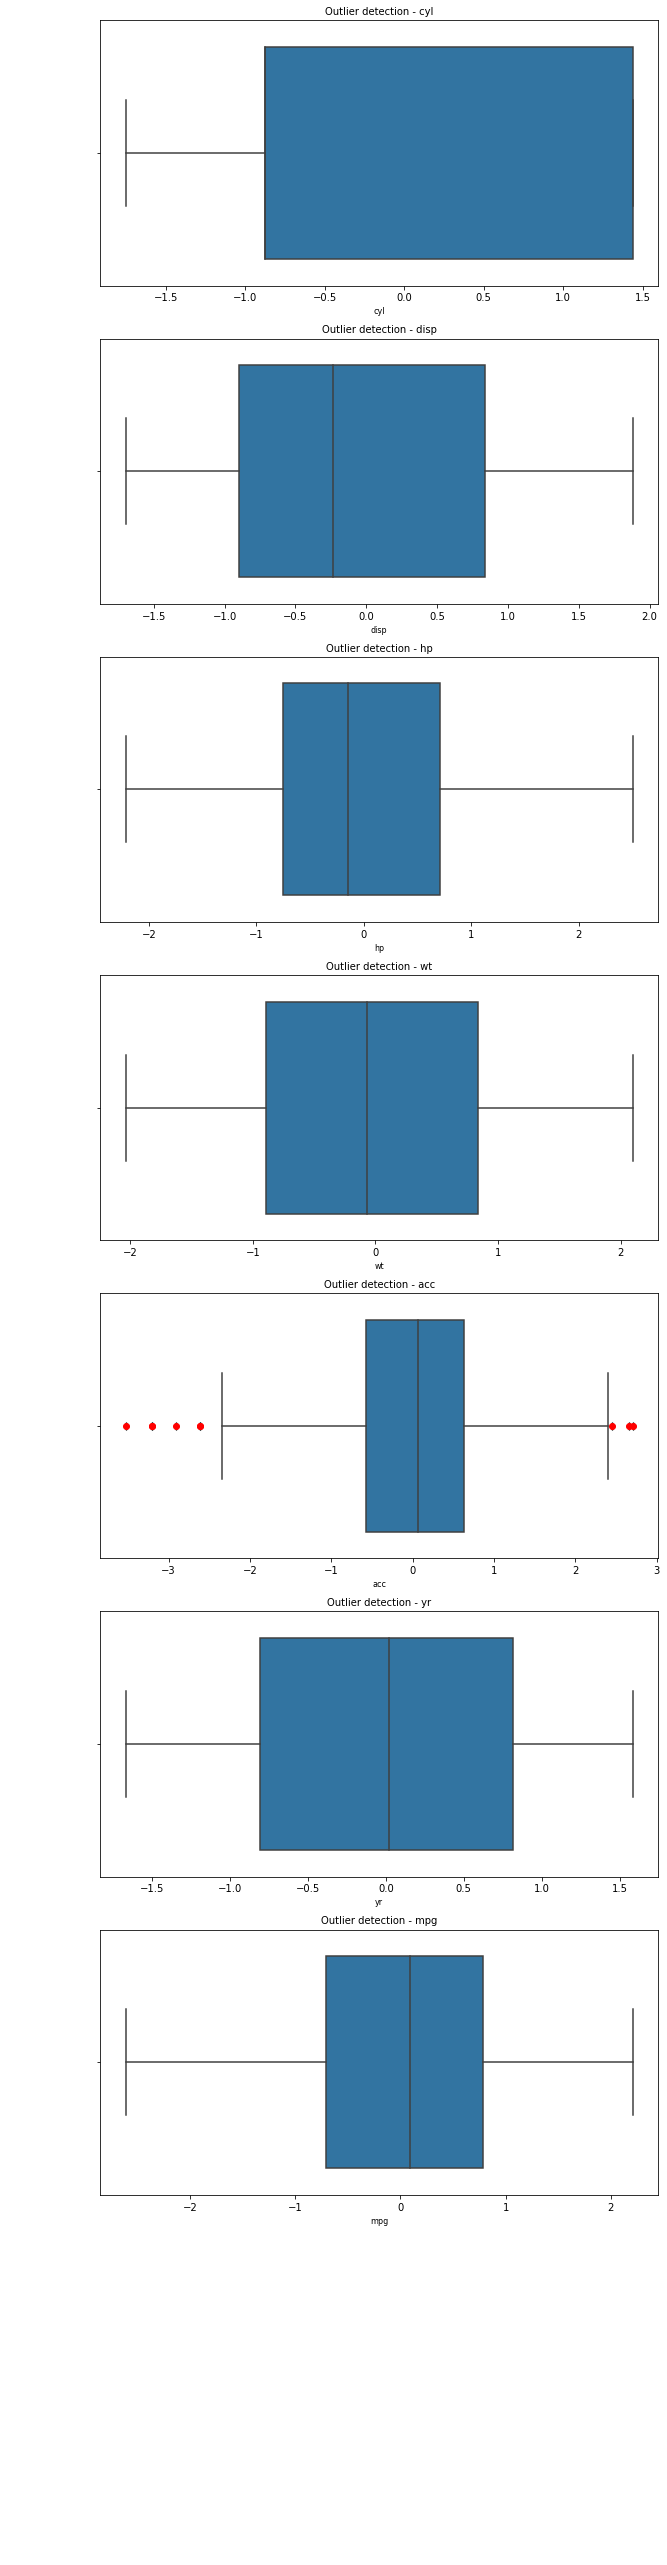

In [51]:
# The below function is inspired from the article https://kite.com/blog/python/data-analysis-visualization-python/
# Checking for Outliers in the data
# IQR based outlier identification - BoxPlot
def IQR_based_outlier(data, threshold = 1.5):
    IQR = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    minval = np.quantile(data,0.25) - IQR * threshold
    maxval = np.quantile(data,0.75) + IQR * threshold
    return (data < minval)|(data > maxval)

col_names = mpg_features_log.select_dtypes(include=['float64','int64']).columns

fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):
    x = mpg_features_log[col_val][:1000]
    sns.boxplot(x, ax=ax[i])
    outliers = x[IQR_based_outlier(x)]
    print('List of Outliers detected for - {} \n '.format(col_val),outliers)
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [52]:
# Log transformation of the data considerably reduced the skew for hp,mpg column column, 
# while still outliers are present for acc which we will not treat
# There is reduction of skew, which means lesser values around the tail
print(mpg_features_log.skew(numeric_only = True, axis = 0))
print(mpg_features_log.kurtosis(numeric_only = True, axis = 0))
print ('The positive values of Skew indicates Right-skewed distribution and negative values Left-Skewed distribution')

cyl     0.393003
disp    0.228886
hp      0.386916
wt      0.156435
acc    -0.315577
yr     -0.047701
mpg    -0.109138
dtype: float64
cyl    -1.496183
disp   -1.341534
hp     -0.377843
wt     -1.087686
acc     0.563758
yr     -1.177028
mpg    -0.819070
dtype: float64
The positive values of Skew indicates Right-skewed distribution and negative values Left-Skewed distribution


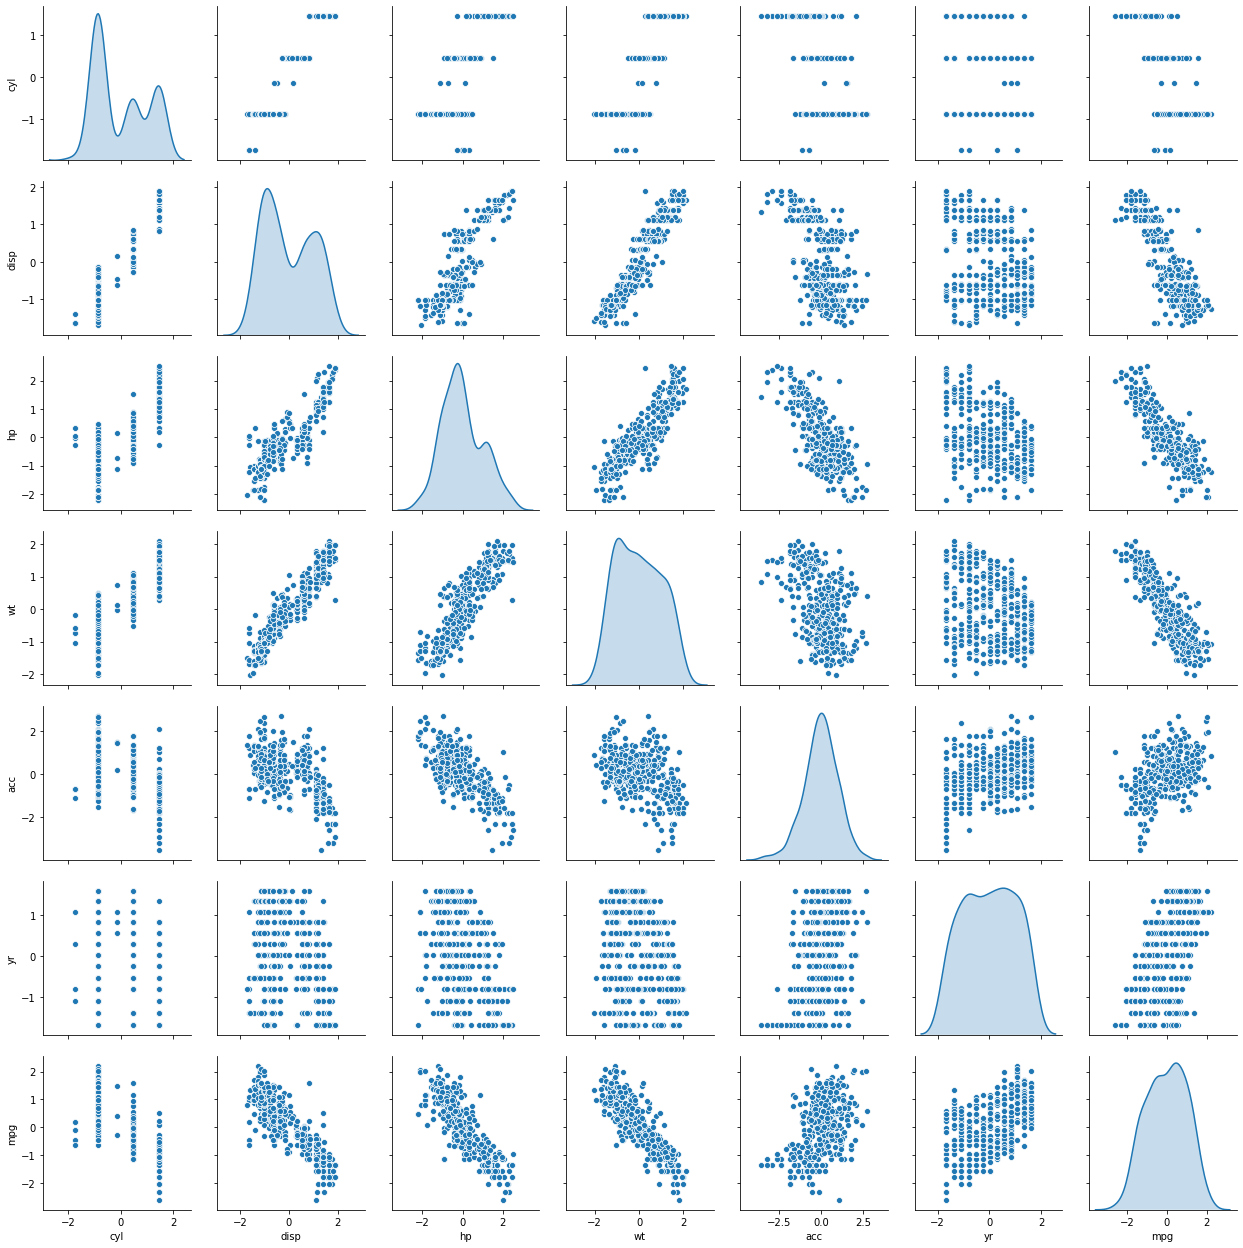

In [27]:
# Bi-variate analysis and visual cue for no of clusters
sns.pairplot(mpg_features_log, diag_kind = 'kde')
# Based on the Peaks, we can infer that there are atleast 3 clusters in this data

(7.0, 0.0)

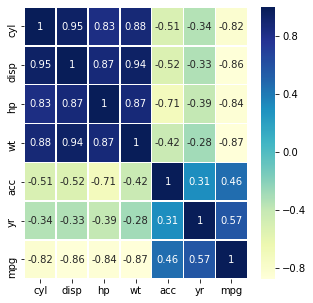

In [53]:
# Finding multi-collinearity - Bi-Variate Analysis after Log Transformation
plt.figure(figsize=(5, 5))
ax = sns.heatmap(mpg_features_log.corr(),annot = True, linewidths = 0.5, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# multi-collinearity for the features cy1, disp and hp and wt is more evident

In [54]:
mpg_df.to_csv('cars_original.csv',index = False) # Imputed refined original data
mpg_features_log.to_csv('cars_treated.csv',index = False)